In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!ls data

cell_images.zip			  malaria_cell_classification_code.zip	train
malaria_cell_classification_code  test


# Loading the Data

In [5]:
import os

os.listdir('data')

['test', 'malaria_cell_classification_code', 'train']

In [6]:
from matplotlib.image import imread

In [7]:
test_path = 'data/test'
train_path = 'data/train'

In [8]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [9]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [12]:
os.listdir(train_path+'/parasitized')[0]

'C182P143NThinF_IMG_20151201_172842_cell_23.png'

In [16]:
para_cell = train_path+'/parasitized/C182P143NThinF_IMG_20151201_172842_cell_23.png'

In [17]:
para_cell

'data/train/parasitized/C182P143NThinF_IMG_20151201_172842_cell_23.png'

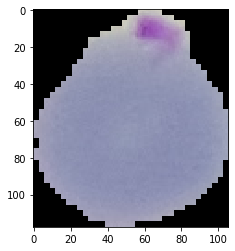

In [20]:
plt.imshow(imread(para_cell))

In [22]:
os.listdir(train_path+'/uninfected')[0]

'C77P38ThinF_IMG_20150602_143524_cell_78.png'

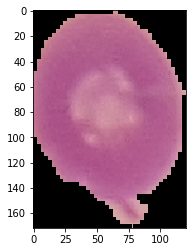

In [23]:
uni_cell = train_path+'/uninfected/C77P38ThinF_IMG_20150602_143524_cell_78.png'
plt.imshow(imread(uni_cell))

In [24]:
pwd

'/home/fares/Fares_Documents/DS_GitHub_Projects/cell_images'

In [26]:
dim_1 = []
dim_2 = []

for image_filename in os.listdir(train_path+'/uninfected'):
    img = imread(train_path+'/uninfected/'+image_filename)
    d1, d2, colors = img.shape
    dim_1.append(d1)
    dim_2.append(d2)

In [27]:
(dim_1)

[172, 139, 130, 157, 109, 142, 157, 127, 136, 148, 130, 178, 142, 91, 154, 133, 118, 133, 130, 139, 130, 118, 142, 88, 127, 124, 127, 139, 121, 151, 115, 130, 109, 100, 145, 130, 118, 121, 157, 124, 145, 130, 136, 154, 121, 139, 118, 103, 109, 136, 136, 148, 133, 130, 106, 124, 130, 154, 148, 133, 190, 157, 127, 76, 115, 118, 130, 145, 115, 148, 115, 100, 91, 145, 136, 127, 190, 100, 115, 106, 154, 115, 115, 121, 118, 151, 103, 115, 154, 127, 145, 148, 127, 118, 127, 103, 133, 139, 151, 127, 103, 100, 103, 145, 124, 100, 154, 145, 127, 133, 115, 133, 133, 130, 139, 136, 127, 136, 103, 133, 133, 145, 193, 133, 127, 142, 139, 145, 112, 115, 100, 124, 109, 151, 145, 157, 148, 154, 163, 145, 133, 142, 136, 142, 109, 121, 142, 142, 157, 127, 133, 127, 118, 121, 124, 145, 118, 133, 148, 118, 127, 127, 139, 124, 130, 145, 148, 154, 163, 121, 112, 136, 115, 145, 139, 136, 148, 103, 124, 145, 127, 121, 133, 130, 136, 100, 103, 151, 151, 130, 169, 133, 139, 124, 109, 91, 124, 130, 151, 121, 109,

In [28]:
print(dim_2)

[121, 145, 142, 166, 124, 130, 130, 121, 139, 145, 151, 151, 121, 100, 130, 124, 112, 142, 112, 142, 130, 118, 133, 97, 106, 121, 136, 121, 139, 151, 112, 133, 133, 100, 163, 121, 124, 136, 142, 130, 127, 169, 130, 157, 142, 142, 139, 115, 118, 193, 136, 106, 124, 112, 103, 121, 118, 121, 142, 124, 148, 166, 136, 91, 130, 148, 121, 136, 112, 142, 199, 103, 94, 121, 121, 118, 130, 115, 115, 106, 154, 109, 127, 121, 121, 121, 112, 127, 154, 130, 160, 130, 127, 142, 136, 100, 133, 142, 127, 121, 103, 121, 127, 148, 136, 130, 124, 130, 142, 124, 124, 130, 127, 127, 124, 133, 154, 139, 136, 133, 139, 130, 106, 124, 103, 142, 121, 121, 118, 121, 100, 127, 106, 100, 157, 100, 139, 148, 118, 136, 142, 118, 133, 151, 106, 124, 145, 151, 109, 130, 148, 124, 127, 127, 130, 142, 127, 142, 145, 109, 130, 130, 130, 142, 121, 133, 142, 166, 172, 127, 127, 130, 118, 121, 151, 124, 118, 109, 142, 145, 127, 94, 154, 142, 139, 106, 106, 145, 142, 154, 151, 154, 130, 112, 130, 112, 133, 139, 133, 133, 121